# Impact of Tweets on Company Stocks

## Introduction

We have noticed in the past few years that tweets with a strong reach do affect the stock rates of companies. For example, Elon Musk tweeting about GameStop has shot the company upwards of 1668% since the tweet in January 2021. By going through a dataset of tweets and stock values of the companies, we can observe as to how big of an impact this has. Our goal in this project will be to determine if there is any relationship between the said items, if there exists a relationship between the two then what is the long-term impact on stocks. To analyze this, we will go through the historic data of tweets related to different companies and study the pattern in their stock values over a period of 5 years. We will also study the impact of high impact tweets, new product launches etc. on the stocks.

## Importing essential libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Importing company and tweet dataset

In [2]:
company = pd.read_csv('Company.csv')
company_tweet = pd.read_csv('Company_Tweet.csv')
tweet = pd.read_csv('Tweet.csv')

## Exploring the tweet dataset

In [3]:
print("Head:")
print(company.head(10))
print("Shape:")
print(company.shape)
print("Null Variables:")
print(company.isna().sum())

Head:
  ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc
5          MSFT    Microsoft
Shape:
(6, 2)
Null Variables:
ticker_symbol    0
company_name     0
dtype: int64


In [4]:
print("Head:")
print(company_tweet.head(10))
print("Shape:")
print(company_tweet.shape)
print("Null Variables:")
print(company_tweet.isna().sum())

Head:
             tweet_id ticker_symbol
0  550803612197457920          AAPL
1  550803610825928706          AAPL
2  550803225113157632          AAPL
3  550802957370159104          AAPL
4  550802855129382912          AAPL
5  550802745737768960          AAPL
6  550797494188142592          AAPL
7  550797275786518528          AAPL
8  550797272686923776          AAPL
9  550796617444765696          AAPL
Shape:
(4336445, 2)
Null Variables:
tweet_id         0
ticker_symbol    0
dtype: int64


In [5]:
print("Head:")
print(tweet.head(10))
print("Shape:")
print(tweet.shape)
print("Null Variables:")
print(tweet.isna().sum())

Head:
             tweet_id           writer   post_date  \
0  550441509175443456  VisualStockRSRC  1420070457   
1  550441672312512512      KeralaGuy77  1420070496   
2  550441732014223360      DozenStocks  1420070510   
3  550442977802207232     ShowDreamCar  1420070807   
4  550443807834402816     i_Know_First  1420071005   
5  550443808606126081    aaplstocknews  1420071005   
6  550443809700851716       iknowfirst  1420071005   
7  550443857142611968      Cprediction  1420071016   
8  550443857595600896    iknowfirst_br  1420071017   
9  550443857692078081  Gold_prediction  1420071017   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...  

## Inner join on tweets and company data for classifying tweets with respect to company

In [6]:
tweetMaster = pd.merge(company_tweet, tweet, on='tweet_id', how='inner')

## Cleaning the data

### Dropping irrelevant columns

In [7]:
tweetMaster = tweetMaster.drop(['tweet_id','writer'], axis=1)

## Generating Insights from Data

In [8]:
tweetMaster['ticker_symbol'].value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

Most tweets point to Apple and Tesla

<AxesSubplot:title={'center':'Tweets by Company'}, xlabel='Company', ylabel='Number of tweets'>

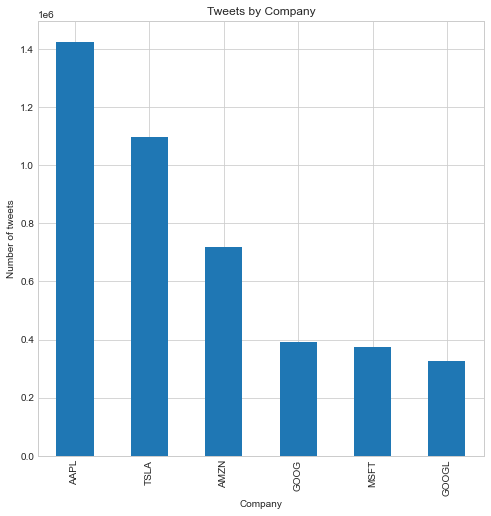

In [9]:
plt.style.use('seaborn-whitegrid')
tweetMaster['ticker_symbol'].value_counts().plot(kind='bar', xlabel='Company', ylabel='Number of tweets',figsize=(8, 8), title='Tweets by Company')

In [10]:
tweetMaster.groupby(['ticker_symbol']).sum()

post_date  comment_num  retweet_num  like_num
ticker_symbol                                                      
AAPL           2120001790926254       222048       722396   1378670
AMZN           1079934701070144       152200       419783    984166
GOOG            580910276881009        30704       147143    235928
GOOGL           490172505957209        58619       191550    406917
MSFT            562022854165740        41533       193364    347520
TSLA           1669286580899971       762813      1078386   5769051

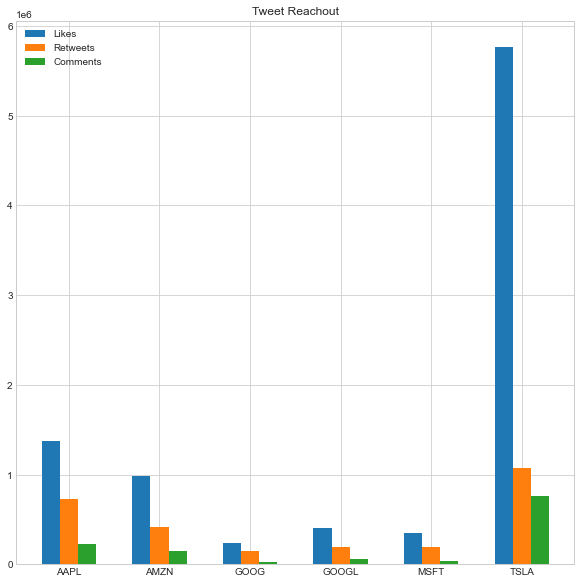

In [11]:
temp = tweetMaster.groupby(['ticker_symbol']).sum()
plt.subplots(figsize=(10, 10))
labels = temp.index.values
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
plt.bar(x-0.2, temp['like_num'], label='Likes', width=width)
plt.bar(x, temp['retweet_num'], label='Retweets', width=width)
plt.bar(x+0.2, temp['comment_num'], label='Comments', width=width)
plt.title("Tweet Reachout")
plt.xticks(x, labels)
plt.grid(True)
plt.legend()
plt.show()

Tesla has the most impact with its tweets

## Modifying the tweet data

In this step we will modify the tweet contents so we only include necessary information.
The following is an example of what we plan to do with one randomly chosen tweet.

In [12]:
tweetMaster_Copy = tweetMaster.copy()
import re
import nltk
tweetMaster_Copy['body'][100]
tweet_body = re.sub('[^a-zA-Z0-9]', ' ', tweetMaster_Copy['body'][100]) # Regular Expression check
print(tweet_body)
tweet_body = tweet_body.lower()
nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))
tweet_body = tweet_body.split()
tweet_body = [word for word in tweet_body if not word in set(stopwords.words('english'))]     # removes irrelevant words such as determiners

Our Penny Stock Picks Gained Over 968  In the Past 5 Weeks  Get our next pick early  http   tinyurl com p46mnk2  TRX  AAPL  GOOG
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aakas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
tweet_body = [ps.stem(word) for word in tweet_body if not word in set(stopwords.words('english'))]      # stems the words to obtain root words
tweet_body = ' '.join(tweet_body)

#### This is how the final tweet looks like

In [14]:
tweet_body

'penni stock pick gain 968 past 5 week get next pick earli http tinyurl com p46mnk2 trx aapl goog'

## Modifying the date to make it more readable

In [15]:
tweetMaster['post_date'] = pd.to_datetime(tweetMaster['post_date'], unit='s')
tweetMaster['post_date'] = pd.to_datetime(tweetMaster['post_date'].apply(lambda date: date.date()))

## Dividing the tweets by companies

In [16]:
apple = tweetMaster[tweetMaster['ticker_symbol'] == 'AAPL']
tesla = tweetMaster[tweetMaster['ticker_symbol'] == 'TSLA']
amazon = tweetMaster[tweetMaster['ticker_symbol'] == 'AMZN']
microsoft = tweetMaster[tweetMaster['ticker_symbol'] == 'MSFT']
google1 = tweetMaster[tweetMaster['ticker_symbol'] == 'GOOG']
google2 = tweetMaster[tweetMaster['ticker_symbol'] == 'GOOGL']

## Exploring Apple's Tweets

### Looking into tweets dealing with apple for the year 2015

<AxesSubplot:title={'center':'Variation of activity'}, xlabel='post_date'>

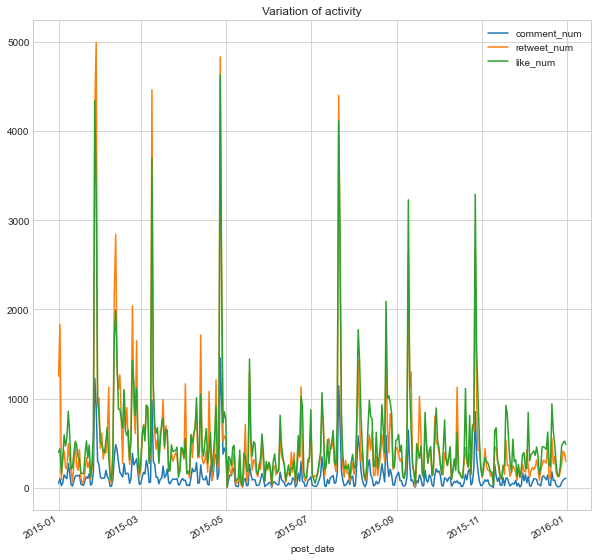

In [17]:
apple2015 = apple[(apple['post_date'] >= '2015-01-01') & (apple['post_date'] <= '2015-12-31')]
apple2015.groupby(['post_date']).sum().plot(figsize=(10, 10), title="Variation of activity")

In [18]:
tempDf = apple2015.groupby(['post_date']).sum()
tempDf.head()

comment_num  retweet_num  like_num
post_date                                     
2015-01-01           51         1250       398
2015-01-02          102         1834       437
2015-01-03           24           94       162
2015-01-04           55          330       332
2015-01-05          145          413       593

### Sorting in descending order to see the busiest days

In [19]:
tempDf = tempDf.sort_values(by=['comment_num', 'retweet_num', 'like_num'], ascending=False)
tempDf.head()

comment_num  retweet_num  like_num
post_date                                     
2015-04-27         1456         4832      4634
2015-01-27         1227         4245      4340
2015-07-21         1145         4400      4113
2015-03-09          986         4463      3699
2015-04-28          982         2158      2453

An interesting news article from the day (27/04/2015) that experienced highest activity on twitter <br/>
https://www.apple.com/newsroom/2015/04/27Apple-Expands-Capital-Return-Program-to-200-Billion/ <br/>
Apple released its q1 earnings on 27th January, 2015 and this link shows the likelihood of high twitter activity on the same day <br/>
https://techcrunch.com/2015/01/27/apple-q1-2015/

## Selecting tweets with more than 100 likes

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence): 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

In [21]:
sentimentDict = []
temp = apple[(apple['like_num'] >= 100)]
for i in range(len(temp)):
  sentimentDict.append(sentiment_scores(temp.iloc[i]['body']))

In [22]:
# Copying the polarity into a new column
temp = temp.assign(polarity=sentimentDict)

In [23]:
graphTemp = temp[(temp['like_num'] >= 100)].groupby(['post_date']).mean()

In [24]:
graphTemp.head()

comment_num  retweet_num    like_num  polarity
post_date                                                 
2015-01-01    15.000000   223.000000  109.000000    0.3612
2015-01-04    19.000000   215.000000  108.000000    0.3612
2015-01-27    39.000000   268.500000  352.500000    0.0000
2015-01-28    25.333333   325.333333  169.666667    0.0000
2015-01-29    24.000000   294.000000  157.000000    0.0000

## Analyzing Variaion of Polarity

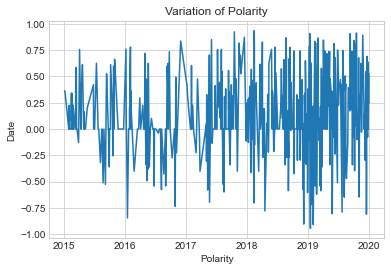

In [25]:
plt.plot(graphTemp.index, graphTemp['polarity'])
plt.xlabel('Polarity')
plt.ylabel('Date')
plt.title('Variation of Polarity')
plt.show()

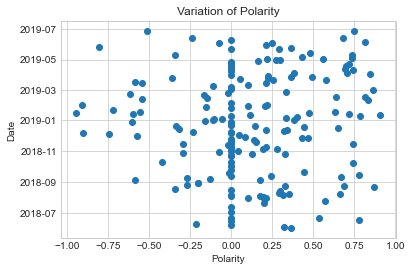

In [26]:
graphTemp_Slice = graphTemp[(graphTemp.index >= np.datetime64('2018-06-01')) & (graphTemp.index <= np.datetime64('2019-06-30'))]
plt.scatter(graphTemp_Slice['polarity'], graphTemp_Slice.index)
plt.xlabel('Polarity')
plt.ylabel('Date')
plt.title('Variation of Polarity')
plt.show()

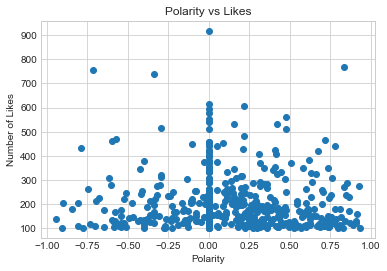

In [27]:
plt.scatter(graphTemp['polarity'], graphTemp['like_num'])
plt.xlabel('Polarity')
plt.ylabel('Number of Likes')
plt.title('Polarity vs Likes')
plt.show()

It is evident that both negative and positive polarity tweets concerning apple generate an equal buzz on twitter

## Generating Insights from Polarity

In [28]:
temp.rename(columns={'post_date':'Date'}, inplace=True)

In [29]:
apple = temp.copy()

In [30]:
apple.sort_values(by=['polarity'], ascending=True)

ticker_symbol       Date  \
1562858          AAPL 2019-01-15   
1580932          AAPL 2019-02-01   
1518167          AAPL 2018-12-06   
1458520          AAPL 2018-10-10   
1327617          AAPL 2018-05-01   
...               ...        ...   
1156986          AAPL 2017-10-16   
1257926          AAPL 2018-02-12   
1636986          AAPL 2019-04-03   
1728912          AAPL 2019-07-14   
1862940          AAPL 2019-12-30   

                                                      body  comment_num  \
1562858  $AAPL raises prices by about 10%, customers ca...           18   
1580932  $AAPL lower low lower high closed below mid BB...            3   
1518167  Huawei is China's Apple $AAPL and its CFO (dau...           19   
1458520  I might not trade big cap stocks like $AMZN $M...            8   
1327617  Amazing how WRONG people have been about $AAPL...           28   
...                                                    ...          ...   
1156986  Join @RobinhoodApp using my special link and g...            0   
1257926  $SPY Well based on my post inside of PowerGrou...           22   
1636986  Go sign up on the RobinHood app using this lin...           14   
1728912  Please ReTweet This!!! If you think your commu...            5   
1862940  2019 Recap: As a hedge fund, we can’t disclose...           20   

         retweet_num  like_num  polarity  
1562858           49       137   -0.9457  
1580932           15       102   -0.9094  
1518167           58       207   -0.9042  
1458520           17       110   -0.8674  
1327617           40       204   -0.8602  
...              ...       ...       ...  
1156986          168       275    0.9246  
1257926           87       100    0.9348  
1636986           18       157    0.9422  
1728912          103       122    0.9439  
1862940           21       111    0.9538  

[958 rows x 7 columns]

In [31]:
apple = apple.groupby(['Date']).mean()

## Importing Apple's stock data

In [32]:
apple_stock = pd.read_csv('AAPL_Stock.csv')
apple_stock.head()

Date       Low      Open     Volume      High     Close  \
0  12-12-1980  0.128348  0.128348  469033600  0.128906  0.128348   
1  15-12-1980  0.121652  0.122210  175884800  0.122210  0.121652   
2  16-12-1980  0.112723  0.113281  105728000  0.113281  0.112723   
3  17-12-1980  0.115513  0.115513   86441600  0.116071  0.115513   
4  18-12-1980  0.118862  0.118862   73449600  0.119420  0.118862   

   Adjusted Close  
0        0.100751  
1        0.095495  
2        0.088485  
3        0.090676  
4        0.093304

Null check on values

In [33]:
apple_stock.isna().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [34]:
print(apple_stock.describe())
print(apple_stock.value_counts())

                Low          Open        Volume          High         Close  \
count  10211.000000  10211.000000  1.021100e+04  10211.000000  10211.000000   
mean      11.094631     11.218862  3.369219e+08     11.338929     11.220425   
std       22.734519     23.010411  3.408572e+08     23.268817     23.008535   
min        0.049107      0.049665  0.000000e+00      0.049665      0.049107   
25%        0.267857      0.276607  1.288000e+08      0.282522      0.275146   
50%        0.441964      0.450893  2.247504e+08      0.459821      0.450893   
75%       12.214464     12.299286  4.189808e+08     12.381072     12.313035   
max      141.369995    143.600006  7.421641e+09    145.089996    143.160004   

       Adjusted Close  
count    10211.000000  
mean        10.642998  
std         22.688209  
min          0.038548  
25%          0.232109  
50%          0.374972  
75%         10.588013  
max        142.704010  
Date        Low         Open        Volume      High        Close       

### Formatting the date

In [35]:
apple_stock['Date'] = pd.to_datetime(apple_stock['Date'], format='%d-%m-%Y')
apple_stock_clean = apple_stock[(apple_stock['Date'] >= np.datetime64('2015-01-01')) & (apple_stock['Date'] <= np.datetime64('2019-12-31'))]

In [36]:
apple.head()

comment_num  retweet_num    like_num  polarity
Date                                                      
2015-01-01    15.000000   223.000000  109.000000    0.3612
2015-01-04    19.000000   215.000000  108.000000    0.3612
2015-01-27    39.000000   268.500000  352.500000    0.0000
2015-01-28    25.333333   325.333333  169.666667    0.0000
2015-01-29    24.000000   294.000000  157.000000    0.0000

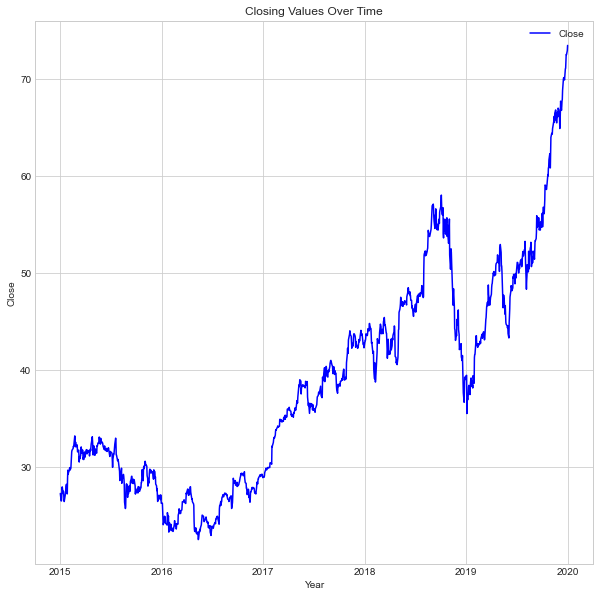

In [37]:
plt.subplots(figsize=(10, 10))
plt.plot(apple_stock_clean['Date'], apple_stock_clean['Close'], color='b', label='Close')
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Closing Values Over Time')
plt.legend()
plt.show()

## Merging stock data with tweet data

In [38]:
appleTweetStockMerge = pd.merge(apple_stock_clean, apple, on='Date', how='inner')

## Visualizing trends in apple's stock

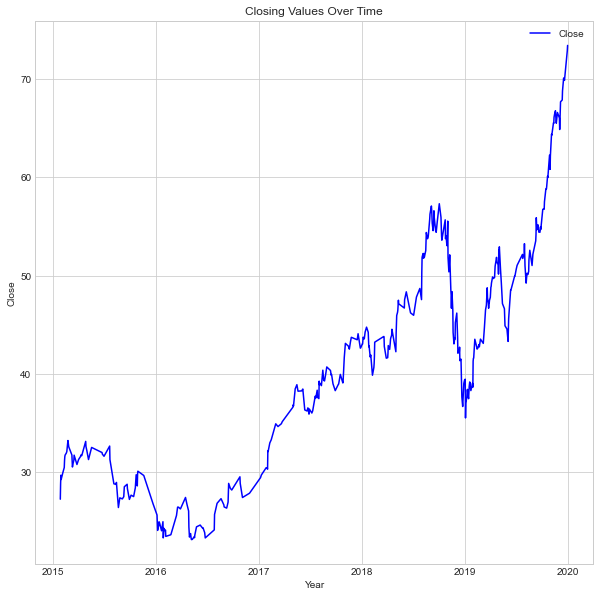

In [39]:
plt.subplots(figsize=(10, 10))
plt.plot(appleTweetStockMerge['Date'], appleTweetStockMerge['Close'], color='b', label='Close')
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Closing Values Over Time')
plt.legend()
plt.show()

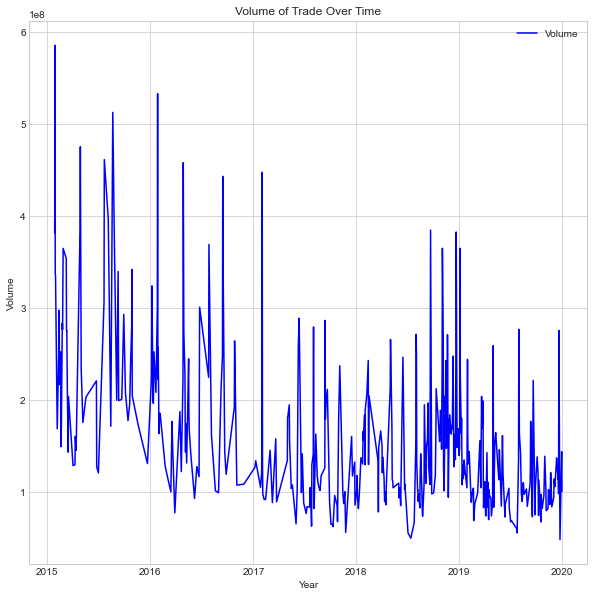

In [40]:
plt.subplots(figsize=(10, 10))
plt.plot(appleTweetStockMerge['Date'], appleTweetStockMerge['Volume'], color='b', label='Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Volume of Trade Over Time')
plt.legend()
plt.show()

## Checking How Skewed the Data is

In [41]:
dailyChange = ((appleTweetStockMerge['Close'] - appleTweetStockMerge['Open'])/appleTweetStockMerge['Open'])

In [42]:
appleTweetStockMerge

Date        Low       Open     Volume       High      Close  \
0   2015-01-27  27.257500  28.105000  382274800  28.120001  27.285000   
1   2015-01-28  28.827499  29.407499  585908400  29.530001  28.827499   
2   2015-01-29  28.889999  29.080000  337745600  29.797501  29.725000   
3   2015-01-30  29.212500  29.600000  334982000  30.000000  29.290001   
4   2015-02-05  29.812500  30.004999  168984800  30.057501  29.985001   
..         ...        ...        ...        ...        ...        ...   
412 2019-12-19  69.737503  69.875000   98369200  70.294998  70.004997   
413 2019-12-20  69.639999  70.557503  275978000  70.662498  69.860001   
414 2019-12-24  70.730003  71.172501   48478800  71.222504  71.067497   
415 2019-12-30  71.305000  72.364998  144114400  73.172501  72.879997   
416 2019-12-31  72.379997  72.482498  100805600  73.419998  73.412498   

     Adjusted Close  comment_num  retweet_num    like_num  polarity  
0         24.776114    39.000000   268.500000  352.500000  0.000000  
1         26.176777    25.333333   325.333333  169.666667  0.000000  
2         26.991747    24.000000   294.000000  157.000000  0.000000  
3         26.596750    15.000000   285.000000  114.000000  0.226300  
4         27.335304    15.000000   132.000000  116.000000  0.000000  
..              ...          ...          ...         ...       ...  
412       69.184532    40.000000   132.000000  563.000000  0.476700  
413       69.041237     7.000000   114.000000  110.000000  0.690800  
414       70.234581    18.000000     4.000000  132.000000 -0.077200  
415       72.025833    10.000000    25.666667  121.666667  0.530233  
416       72.552094    11.666667    17.666667  171.000000  0.245700  

[417 rows x 11 columns]

In [43]:
dailyChange

0     -0.029176
1     -0.019723
2      0.022180
3     -0.010473
4     -0.000667
         ...   
412    0.001860
413   -0.009886
414   -0.001475
415    0.007117
416    0.012831
Length: 417, dtype: float64

<Figure size 720x432 with 0 Axes>

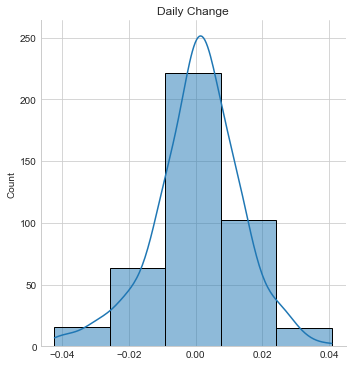

In [44]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.displot(dailyChange, kde=True, bins=5)
plt.title('Daily Change')
plt.show()

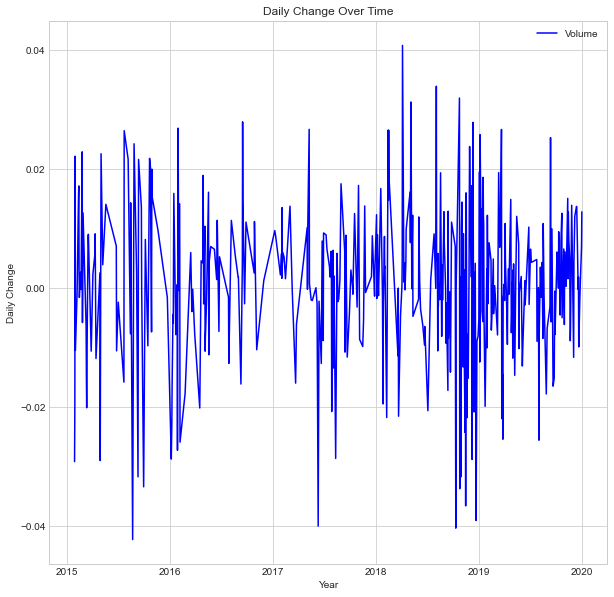

In [45]:
plt.subplots(figsize=(10, 10))
plt.plot(appleTweetStockMerge['Date'], dailyChange, color='b', label='Volume')
plt.xlabel('Year')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

Lets focus on 2018 data 

## Variation of Polarity

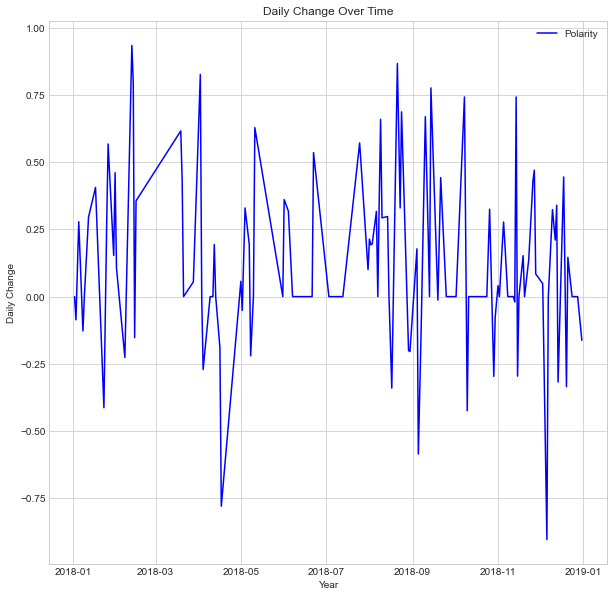

In [46]:
apple_stock_clean_2018 = appleTweetStockMerge[(appleTweetStockMerge['Date'] >= np.datetime64('2018-01-01')) & (appleTweetStockMerge['Date'] <= np.datetime64('2018-12-31'))]
plt.subplots(figsize=(10, 10))
plt.plot(apple_stock_clean_2018['Date'], apple_stock_clean_2018['polarity'], color='b', label='Polarity')
plt.xlabel('Year')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

In [47]:
apple_stock_clean_2018

Date        Low       Open     Volume       High      Close  \
178 2018-01-02  42.314999  42.540001  102223600  43.075001  43.064999   
179 2018-01-03  42.990002  43.132500  118071600  43.637501  43.057499   
180 2018-01-05  43.262501  43.360001   94640000  43.842499  43.750000   
181 2018-01-08  43.482498  43.587502   82271200  43.902500  43.587502   
182 2018-01-09  43.352501  43.637501   86336000  43.764999  43.582500   
..         ...        ...        ...        ...        ...        ...   
286 2018-12-20  38.825001  40.099998  259092000  40.527500  39.207500   
287 2018-12-21  37.407501  39.215000  382978400  39.540001  37.682499   
288 2018-12-24  36.647499  37.037498  148676800  37.887501  36.707500   
289 2018-12-28  38.637501  39.375000  169165600  39.630001  39.057499   
290 2018-12-31  39.119999  39.632500  140014000  39.840000  39.435001   

     Adjusted Close  comment_num  retweet_num    like_num  polarity  
178       41.310070     0.000000   311.000000  371.000000  0.000000  
179       41.302879    26.000000    68.000000  256.000000 -0.086500  
180       41.967163     2.000000    67.000000  126.500000  0.278700  
181       41.811283    16.000000    50.000000  136.000000 -0.128000  
182       41.806496     6.000000   102.000000  148.000000  0.000000  
..              ...          ...          ...         ...       ...  
286       38.174412    25.000000    12.000000  220.500000 -0.335250  
287       36.689594    16.714286    56.428571  199.571429  0.145957  
288       35.740280    17.000000   240.000000  439.000000  0.000000  
289       38.028370    16.000000    27.000000  182.000000  0.000000  
290       38.395920    23.500000    21.000000  121.500000 -0.162500  

[113 rows x 11 columns]

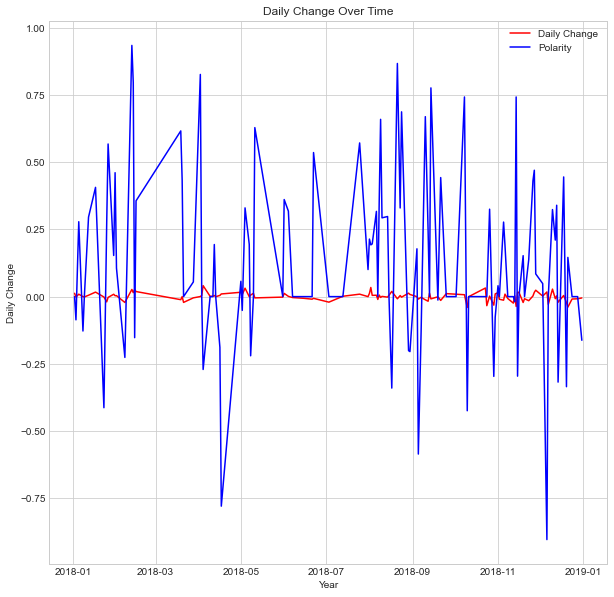

In [48]:
dailyChange = ((apple_stock_clean_2018['Close'] - apple_stock_clean_2018['Open'])/apple_stock_clean_2018['Open'])
plt.subplots(figsize=(10, 10))
plt.plot(apple_stock_clean_2018['Date'], dailyChange, color='r', label='Daily Change')
plt.plot(apple_stock_clean_2018['Date'], apple_stock_clean_2018['polarity'], color='b', label='Polarity')
plt.xlabel('Year')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

In [49]:
dailyChange

178    0.012341
179   -0.001739
180    0.008994
181    0.000000
182   -0.001260
         ...   
286   -0.022257
287   -0.039079
288   -0.008910
289   -0.008064
290   -0.004983
Length: 113, dtype: float64

In [50]:
print(dailyChange.min())
print(dailyChange.max())
print(apple_stock_clean_2018['polarity'].min())
print(apple_stock_clean_2018['polarity'].max())

-0.04036195259704975
0.04081753716784742
-0.9042
0.9348


Lets scale polarity down to dailyChange's level

## Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
mms_scale=MinMaxScaler(feature_range=(-0.04228921630027771,0.04081753716784742))
dummyDf = pd.DataFrame(data=apple_stock_clean_2018['polarity'], columns=['polarity'])
scaled_xtrain=pd.DataFrame(mms_scale.fit_transform(dummyDf), columns=dummyDf.columns)

In [52]:
print(scaled_xtrain.max())
print(scaled_xtrain.min())

polarity    0.040818
dtype: float64
polarity   -0.042289
dtype: float64


In [53]:
apple_stock_clean_2018['Date']

178   2018-01-02
179   2018-01-03
180   2018-01-05
181   2018-01-08
182   2018-01-09
         ...    
286   2018-12-20
287   2018-12-21
288   2018-12-24
289   2018-12-28
290   2018-12-31
Name: Date, Length: 113, dtype: datetime64[ns]

In [54]:
dailyChange

178    0.012341
179   -0.001739
180    0.008994
181    0.000000
182   -0.001260
         ...   
286   -0.022257
287   -0.039079
288   -0.008910
289   -0.008064
290   -0.004983
Length: 113, dtype: float64

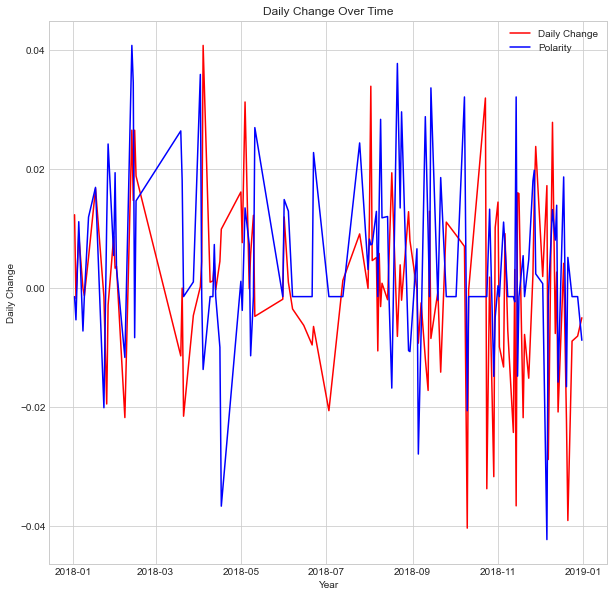

In [55]:
plt.subplots(figsize=(10, 10))
plt.plot(apple_stock_clean_2018['Date'], dailyChange, color='r', label='Daily Change')
plt.plot(apple_stock_clean_2018['Date'], scaled_xtrain['polarity'], color='b', label='Polarity')
plt.xlabel('Year')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

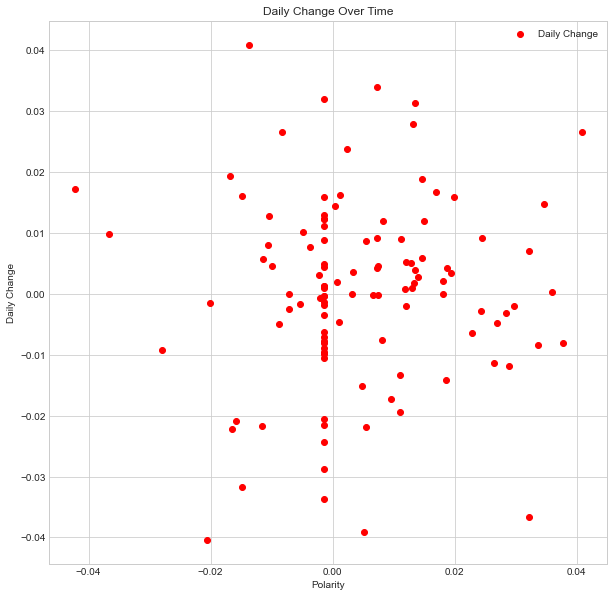

In [56]:
plt.subplots(figsize=(10, 10))
plt.scatter(scaled_xtrain['polarity'], dailyChange, color='r', label='Daily Change')
plt.xlabel('Polarity')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

## Justifying Returns

In [57]:
appleTweetStockMerge['PriceDiff'] = appleTweetStockMerge['Close'].shift(-1) - appleTweetStockMerge['Close']
appleTweetStockMerge['DailyReturn'] = appleTweetStockMerge['PriceDiff'] /appleTweetStockMerge['Close']

In [58]:
dailyChange = apple_stock_clean_2018['Close'].shift(-1) - apple_stock_clean_2018['Close']

In [59]:
print(dailyChange.min())
print(dailyChange.max())
print(apple_stock_clean_2018['polarity'].min())
print(apple_stock_clean_2018['polarity'].max())

-3.6850013732910156
2.802501678466797
-0.9042
0.9348


In [60]:
dailyChange = pd.DataFrame(dailyChange)
dailyChange.rename(columns={0:'DailyChange'}, inplace=True)

In [61]:
dailyChange.head()

Close
178 -0.007500
179  0.692501
180 -0.162498
181 -0.005001
182  0.689999

In [62]:
from sklearn.preprocessing import MinMaxScaler
mms_scale=MinMaxScaler(feature_range=(-0.9042,0.9348))
dummyDf = pd.DataFrame(data=dailyChange, columns=['Close'])
scaled_xtrain=pd.DataFrame(mms_scale.fit_transform(dummyDf), columns=dummyDf.columns)

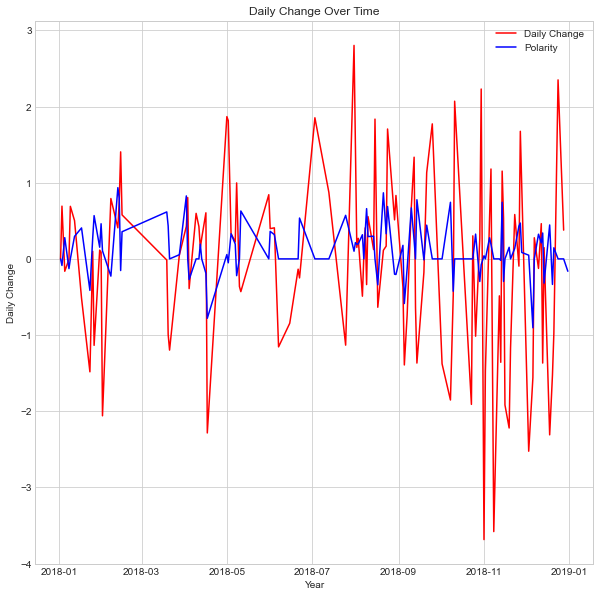

In [63]:
plt.subplots(figsize=(10, 10))
plt.plot(apple_stock_clean_2018['Date'], dailyChange, color='r', label='Daily Change')
plt.plot(apple_stock_clean_2018['Date'], apple_stock_clean_2018['polarity'], color='b', label='Polarity')
plt.xlabel('Year')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

In [64]:
apple_stock_clean_2018

Date        Low       Open     Volume       High      Close  \
178 2018-01-02  42.314999  42.540001  102223600  43.075001  43.064999   
179 2018-01-03  42.990002  43.132500  118071600  43.637501  43.057499   
180 2018-01-05  43.262501  43.360001   94640000  43.842499  43.750000   
181 2018-01-08  43.482498  43.587502   82271200  43.902500  43.587502   
182 2018-01-09  43.352501  43.637501   86336000  43.764999  43.582500   
..         ...        ...        ...        ...        ...        ...   
286 2018-12-20  38.825001  40.099998  259092000  40.527500  39.207500   
287 2018-12-21  37.407501  39.215000  382978400  39.540001  37.682499   
288 2018-12-24  36.647499  37.037498  148676800  37.887501  36.707500   
289 2018-12-28  38.637501  39.375000  169165600  39.630001  39.057499   
290 2018-12-31  39.119999  39.632500  140014000  39.840000  39.435001   

     Adjusted Close  comment_num  retweet_num    like_num  polarity  
178       41.310070     0.000000   311.000000  371.000000  0.000000  
179       41.302879    26.000000    68.000000  256.000000 -0.086500  
180       41.967163     2.000000    67.000000  126.500000  0.278700  
181       41.811283    16.000000    50.000000  136.000000 -0.128000  
182       41.806496     6.000000   102.000000  148.000000  0.000000  
..              ...          ...          ...         ...       ...  
286       38.174412    25.000000    12.000000  220.500000 -0.335250  
287       36.689594    16.714286    56.428571  199.571429  0.145957  
288       35.740280    17.000000   240.000000  439.000000  0.000000  
289       38.028370    16.000000    27.000000  182.000000  0.000000  
290       38.395920    23.500000    21.000000  121.500000 -0.162500  

[113 rows x 11 columns]

## Considering moving average

In [65]:
apple_stock_clean.index = apple_stock_clean['Date']

### Calculating Shares

<ipython-input-66-2725ea680bd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock_clean['MA50'] = apple_stock_clean['Close'].rolling(50).mean()
<ipython-input-66-2725ea680bd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock_clean['MA10'] = apple_stock_clean['Close'].rolling(10).mean()


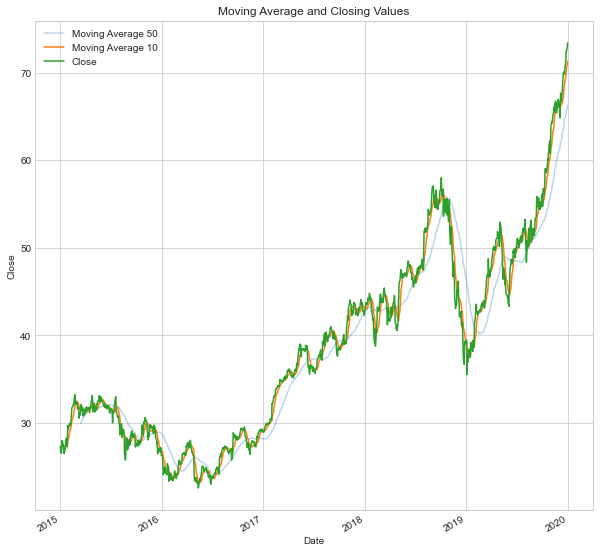

In [66]:
apple_stock_clean['MA50'] = apple_stock_clean['Close'].rolling(50).mean()
apple_stock_clean['MA10'] = apple_stock_clean['Close'].rolling(10).mean()
#plot the moving average
plt.figure(figsize=(10, 10))
apple_stock_clean['MA50'].plot(label='Moving Average 50', alpha=0.3)
apple_stock_clean['MA10'].plot(label='Moving Average 10')
apple_stock_clean['Close'].plot(label='Close')
plt.legend()
plt.title('Moving Average and Closing Values')
plt.ylabel('Close')
plt.show()

In [67]:
apple_stock_clean['Shares'] = [1 if apple_stock_clean.loc[sh, 'MA10']>apple_stock_clean.loc[sh, 'MA50'] else 0 for sh in apple_stock_clean.index]

<ipython-input-67-cba9997ef046>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock_clean['Shares'] = [1 if apple_stock_clean.loc[sh, 'MA10']>apple_stock_clean.loc[sh, 'MA50'] else 0 for sh in apple_stock_clean.index]


### Calculating returns

In [68]:
apple_stock_clean['CloseNew'] = apple_stock_clean['Close'].shift(-1)
apple_stock_clean['Profit'] = [apple_stock_clean.loc[sh, 'CloseNew'] - apple_stock_clean.loc[sh, 'Close'] if apple_stock_clean.loc[sh, 'Shares']==1 else 0 for sh in apple_stock_clean.index]

<ipython-input-68-f5f28220fd13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock_clean['CloseNew'] = apple_stock_clean['Close'].shift(-1)
<ipython-input-68-f5f28220fd13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock_clean['Profit'] = [apple_stock_clean.loc[sh, 'CloseNew'] - apple_stock_clean.loc[sh, 'Close'] if apple_stock_clean.loc[sh, 'Shares']==1 else 0 for sh in apple_stock_clean.index]


In [69]:
apple_stock_clean['cumulativeGrowth'] = apple_stock_clean['Profit'].cumsum()
apple_stock_clean.tail(10)

<ipython-input-69-4c5607698fb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock_clean['cumulativeGrowth'] = apple_stock_clean['Profit'].cumsum()


Date        Low       Open     Volume       High      Close  \
Date                                                                           
2019-12-17 2019-12-17  69.699997  69.892502  114158400  70.442497  70.102501   
2019-12-18 2019-12-18  69.779999  69.949997  116028400  70.474998  69.934998   
2019-12-19 2019-12-19  69.737503  69.875000   98369200  70.294998  70.004997   
2019-12-20 2019-12-20  69.639999  70.557503  275978000  70.662498  69.860001   
2019-12-23 2019-12-23  70.092499  70.132500   98572000  71.062500  71.000000   
2019-12-24 2019-12-24  70.730003  71.172501   48478800  71.222504  71.067497   
2019-12-26 2019-12-26  71.175003  71.205002   93121200  72.495003  72.477501   
2019-12-27 2019-12-27  72.029999  72.779999  146266000  73.492500  72.449997   
2019-12-30 2019-12-30  71.305000  72.364998  144114400  73.172501  72.879997   
2019-12-31 2019-12-31  72.379997  72.482498  100805600  73.419998  73.412498   

            Adjusted Close      MA50       MA10  Shares   CloseNew    Profit  \
Date                                                                           
2019-12-17       69.280899  63.89125  67.776999       1  69.934998 -0.167503   
2019-12-18       69.115349  64.16795  68.226999       1  70.004997  0.070000   
2019-12-19       69.184532  64.43290  68.587999       1  69.860001 -0.144997   
2019-12-20       69.041237  64.67965  68.806249       1  71.000000  1.139999   
2019-12-23       70.167885  64.91860  69.233249       1  71.067497  0.067497   
2019-12-24       70.234581  65.16060  69.627998       1  72.477501  1.410004   
2019-12-26       71.628067  65.43355  70.106499       1  72.449997 -0.027504   
2019-12-27       71.600876  65.71070  70.564999       1  72.879997  0.430000   
2019-12-30       72.025833  65.99190  70.974249       1  73.412498  0.532501   
2019-12-31       72.552094  66.27810  71.318999       1        NaN       NaN   

            cumulativeGrowth  
Date                          
2019-12-17         29.352489  
2019-12-18         29.422489  
2019-12-19         29.277493  
2019-12-20         30.417492  
2019-12-23         30.484989  
2019-12-24         31.894993  
2019-12-26         31.867489  
2019-12-27         32.297489  
2019-12-30         32.829990  
2019-12-31               NaN

Total growth in 5 years: 32.82999038696289


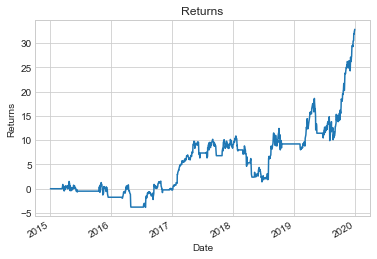

In [70]:
apple_stock_clean['cumulativeGrowth'].plot()
plt.title('Returns')
plt.ylabel('Returns')
print('Total growth in 5 years: {}'.format(apple_stock_clean.loc[apple_stock_clean.index[-2], 'cumulativeGrowth']))

## Frequency Distribution

<ipython-input-71-c4fd44d8d440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock_clean['LogReturn'] = np.log(apple_stock_clean['Close']).shift(-1) - np.log(apple_stock_clean['Close'])


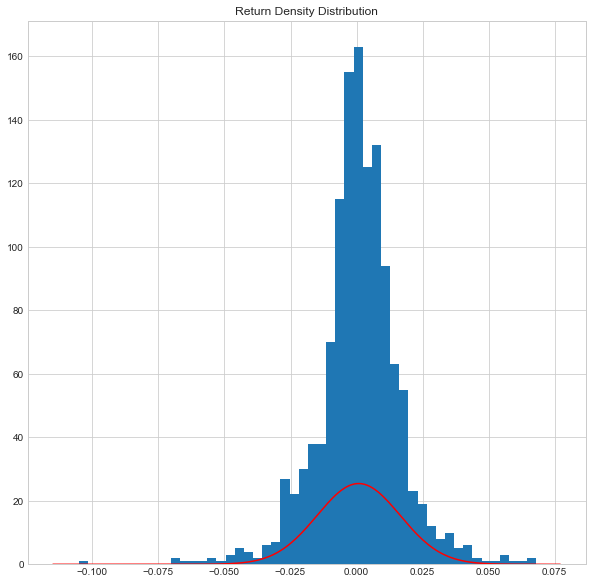

In [71]:
apple_stock_clean['LogReturn'] = np.log(apple_stock_clean['Close']).shift(-1) - np.log(apple_stock_clean['Close'])
from scipy.stats import norm
a = apple_stock_clean['LogReturn'].mean()
b = apple_stock_clean['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(apple_stock_clean['LogReturn'].min()-0.01, apple_stock_clean['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], a, b)

apple_stock_clean['LogReturn'].hist(bins=50, figsize=(10, 10))
plt.plot(density['x'], density['pdf'], color='red')
plt.title('Return Density Distribution')

plt.show()

In [72]:
prob_return = norm.cdf(-0.10, a, b)
print('The probability of dropping over 10% in one day ', prob_return)

The probability of dropping over 10% in one day  6.614985218777504e-11


## Conclusion - Company like Apple has no impact of what people talk about it

## Tesla

Text(0.5, 0, 'Year')

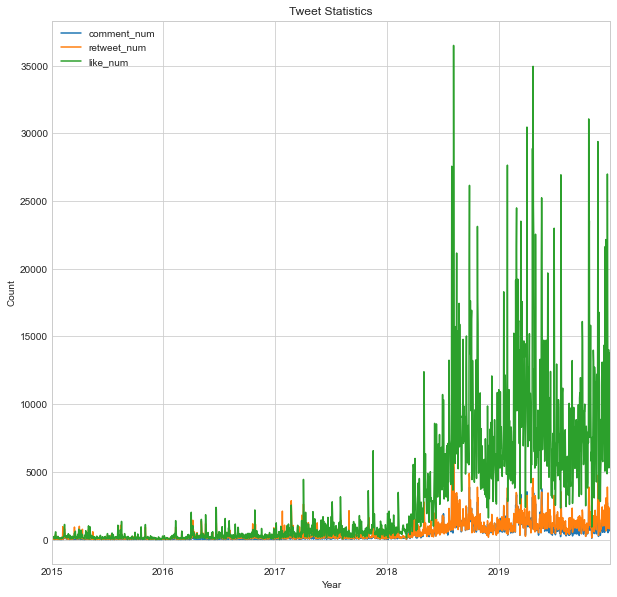

In [73]:
tesla.groupby(['post_date']).sum().plot(figsize=(10, 10))
plt.title('Tweet Statistics')
plt.ylabel('Count')
plt.xlabel('Year')

In [74]:
tempDf = tesla.groupby(['post_date']).sum()
tempDf.head()

comment_num  retweet_num  like_num
post_date                                     
2015-01-01           25           47        95
2015-01-02           41           47       130
2015-01-03           11           33       103
2015-01-04           10           26        62
2015-01-05           24           80       205

In [75]:
tempDf = tempDf.sort_values(by=['comment_num', 'retweet_num', 'like_num'], ascending=False)
tempDf.head()

comment_num  retweet_num  like_num
post_date                                     
2018-08-07         5373         7455     36495
2019-11-22         4223         4748     29395
2019-04-24         3980         4513     34948
2018-09-28         3867         4589     26160
2018-08-08         3823         5103     23547

Tesla shares surge 10% after Elon Musk shocks market with tweet about going private

## Selecting tweets with more than 100 likes

In [76]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence): 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

In [77]:
sentimentDict = []
temp = tesla[(tesla['like_num'] > 50)]
for i in range(len(temp)):
  sentimentDict.append(sentiment_scores(temp.iloc[i]['body']))

In [78]:
# Copying the polarity into a new column
temp = temp.assign(polarity=sentimentDict)

In [79]:
temp

ticker_symbol  post_date  \
64728            TSLA 2015-02-14   
278898           TSLA 2015-07-30   
477256           TSLA 2016-01-27   
588853           TSLA 2016-04-16   
792983           TSLA 2016-09-12   
...               ...        ...   
4336304          TSLA 2019-12-31   
4336315          TSLA 2019-12-31   
4336316          TSLA 2019-12-31   
4336342          TSLA 2019-12-31   
4336399          TSLA 2019-12-31   

                                                      body  comment_num  \
64728    $TSLA fans, it looks like $AAPL has decided to...           39   
278898   $AAPL has enough cash to buy:$NFLX $TSLA$TWTR$...           13   
477256   $AAPL should pay 2x premium for both $NFLX and...           32   
588853   $SPX on the top of downtrend Channel Be carefu...            0   
792983   Monday Market Movement - Hedging for Disaster ...            0   
...                                                    ...          ...   
4336304  I have not seen a company try this hard to win...           10   
4336315  China is the biggest auto and EV market of the...            2   
4336316  What a nice little surprise to find at the gro...           39   
4336342  My top picks for 2020 (in no particular order)...           11   
4336399  $TSLA Interesting...$93M trade after hours!Whe...           15   

         retweet_num  like_num  polarity  
64728             60        61    0.7269  
278898            47        54    0.0000  
477256            50       142    0.6114  
588853            45        83    0.4003  
792983             0        78   -0.6249  
...              ...       ...       ...  
4336304           32       376    0.9556  
4336315            5        58   -0.1027  
4336316           23       521    0.8316  
4336342            8        66   -0.1027  
4336399            7        64    0.0000  

[21717 rows x 7 columns]

## Variation of Polarity

In [80]:
graphTemp = temp[(temp['like_num'] > 0)].groupby(['post_date']).max()

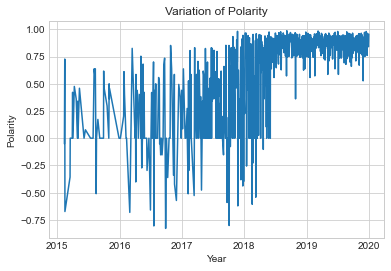

In [81]:
plt.plot(graphTemp.index, graphTemp['polarity'])
plt.xlabel('Year')
plt.ylabel('Polarity')
plt.title('Variation of Polarity')
plt.show()

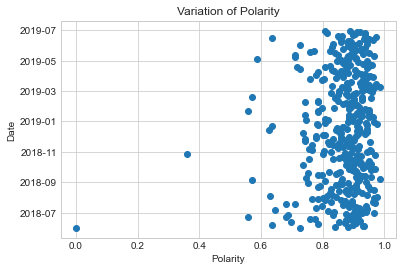

In [82]:
graphTemp_Slice = graphTemp[(graphTemp.index >= np.datetime64('2018-06-01')) & (graphTemp.index <= np.datetime64('2019-06-30'))]
plt.scatter(graphTemp_Slice['polarity'], graphTemp_Slice.index)
plt.xlabel('Polarity')
plt.ylabel('Date')
plt.title('Variation of Polarity')
plt.show()

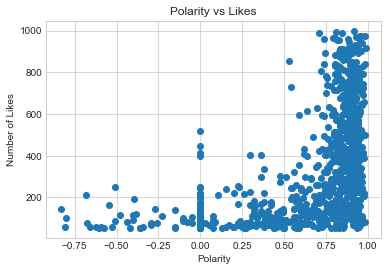

In [83]:
plt.scatter(graphTemp['polarity'], graphTemp['like_num'])
plt.xlabel('Polarity')
plt.ylabel('Number of Likes')
plt.title('Polarity vs Likes')
plt.show()

In [84]:
temp.rename(columns={'post_date':'Date'}, inplace=True)

In [85]:
tesla = temp.copy()
tesla.sort_values(by=['polarity'], ascending=True)

ticker_symbol       Date  \
4179794          TSLA 2019-06-11   
4166137          TSLA 2019-05-28   
4107769          TSLA 2019-04-13   
4081248          TSLA 2019-03-21   
4113471          TSLA 2019-04-20   
...               ...        ...   
4320978          TSLA 2019-12-16   
4197003          TSLA 2019-07-02   
2414989          TSLA 2017-11-22   
4067012          TSLA 2019-03-09   
3880403          TSLA 2018-09-07   

                                                      body  comment_num  \
4179794  Prediction for today's $TSLA meeting: bullshit...           15   
4166137  First, there was $TSLA production hell. Then d...            7   
4107769  Elon going thru his pump list : $420 failed. S...            7   
4081248  Here's what we know about $TSLA's production f...            4   
4113471  Sorry for spinning this as a $TSLA non-event (...           13   
...                                                    ...          ...   
4320978  After a depressing wk, mkt greeted me w/ gifts...           13   
4197003   SUPER HUGE ENORMOUS CONGRATS to all at @Tesla...            0   
2414989  Truly a SUPER GREAT day with tons profits lock...           12   
4067012  @elonmusk had a great trip to Fremont yesterda...            6   
3880403  #WOW! WOW WOW WOW! @elonmusk and @woodhaus2 yo...           38   

         retweet_num  like_num  polarity  
4179794            9       121   -0.9978  
4166137            5        94   -0.9858  
4107769            5        61   -0.9850  
4081248           10        51   -0.9798  
4113471            1        52   -0.9781  
...              ...       ...       ...  
4320978            1        70    0.9803  
4197003            7        77    0.9806  
2414989            0        70    0.9817  
4067012            8       106    0.9848  
3880403           49       308    0.9869  

[21717 rows x 7 columns]

In [86]:
tesla = tesla.groupby(['Date']).max()

## Reading tesla stocks

In [87]:
tesla_stock = pd.read_csv('TSLA_Stock.csv')
tesla_stock.isna().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [88]:
print(tesla_stock.describe())
print(tesla_stock.value_counts())

               Low         Open        Volume         High        Close  \
count  2758.000000  2758.000000  2.758000e+03  2758.000000  2758.000000   
mean     84.788900    86.877539  2.958910e+07    88.772827    86.900991   
std     153.686349   157.879600  2.708276e+07   161.455370   157.873777   
min       2.996000     3.228000  5.925000e+05     3.326000     3.160000   
25%       7.775000     7.843500  1.111742e+07     7.949500     7.850000   
50%      44.447001    45.342001  2.373385e+07    45.973999    45.220999   
75%      61.920000    62.975501  3.821450e+07    63.979000    63.075000   
max     871.599976   891.380005  3.046940e+08   900.400024   883.090027   

       Adjusted Close  
count     2758.000000  
mean        86.900991  
std        157.873777  
min          3.160000  
25%          7.850000  
50%         45.220999  
75%         63.075000  
max        883.090027  
Date        Low         Open        Volume    High        Close       Adjusted Close
01-02-2011  4.708000   

## Formatting Data

In [89]:
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'], format='%d-%m-%Y')
tesla_stock_clean = tesla_stock[(tesla_stock['Date'] >= np.datetime64('2015-01-01')) & (tesla_stock['Date'] <= np.datetime64('2019-12-31'))]

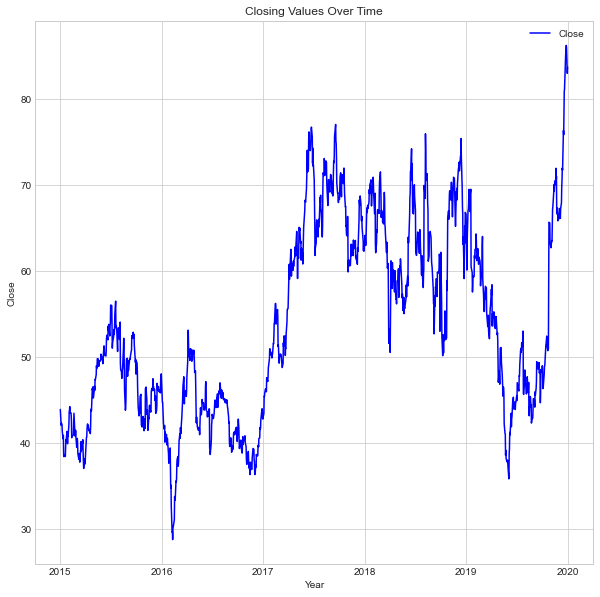

In [90]:
plt.subplots(figsize=(10, 10))
plt.plot(tesla_stock_clean['Date'], tesla_stock_clean['Close'], color='b', label='Close')
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Closing Values Over Time')
plt.legend()
plt.show()

## Merging with tweets

In [91]:
teslaTweetStockMerge = pd.merge(tesla_stock_clean, tesla, on='Date', how='inner')

## Visualizing trends in Tesla's stocks

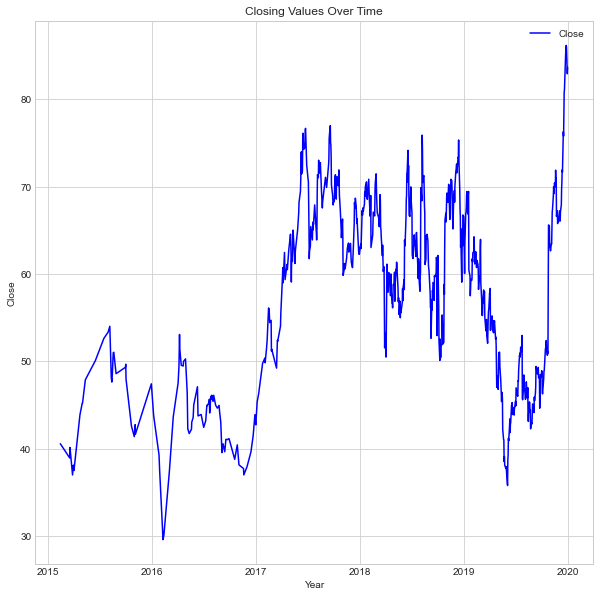

In [92]:
plt.subplots(figsize=(10, 10))
plt.plot(teslaTweetStockMerge['Date'], teslaTweetStockMerge['Close'], color='b', label='Close')
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Closing Values Over Time')
plt.legend()
plt.show()

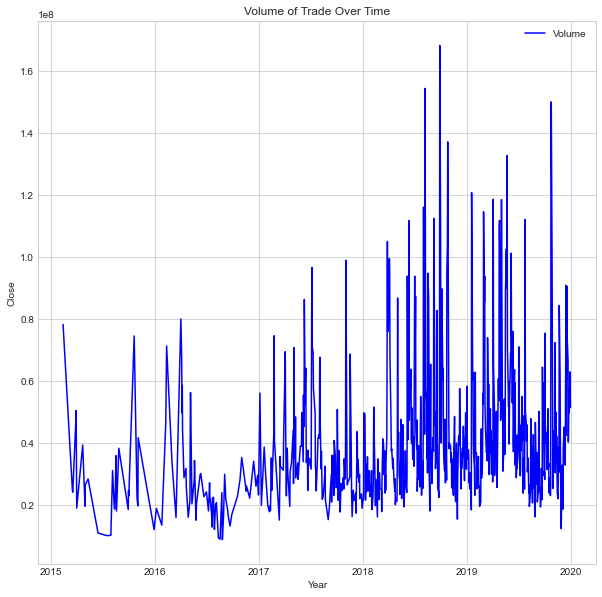

In [93]:
plt.subplots(figsize=(10, 10))
plt.plot(teslaTweetStockMerge['Date'], teslaTweetStockMerge['Volume'], color='b', label='Volume')
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Volume of Trade Over Time')
plt.legend()
plt.show()

In [94]:
dailyChange = ((teslaTweetStockMerge['Close'] - teslaTweetStockMerge['Open'])/teslaTweetStockMerge['Open'])

<Figure size 720x432 with 0 Axes>

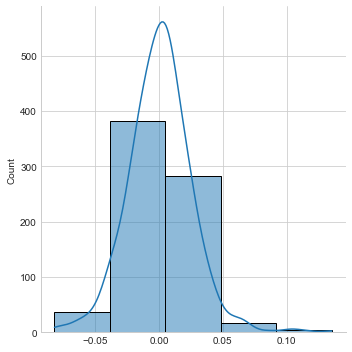

In [95]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.displot(dailyChange, kde=True, bins=5)
plt.show()

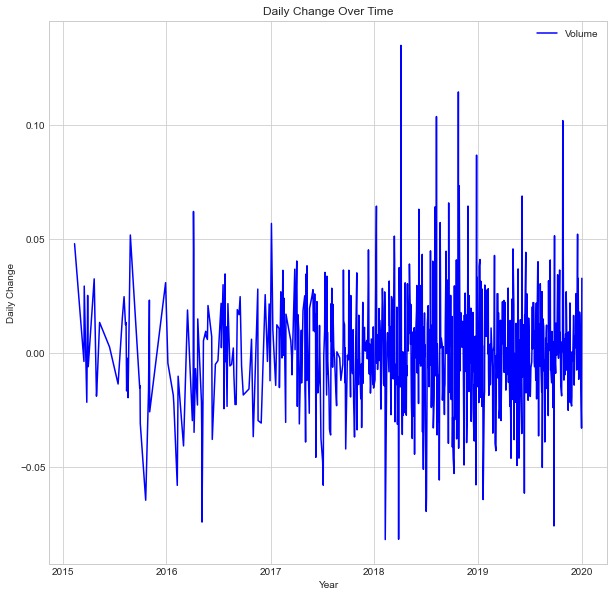

In [96]:
plt.subplots(figsize=(10, 10))
plt.plot(teslaTweetStockMerge['Date'], dailyChange, color='b', label='Volume')
plt.xlabel('Year')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

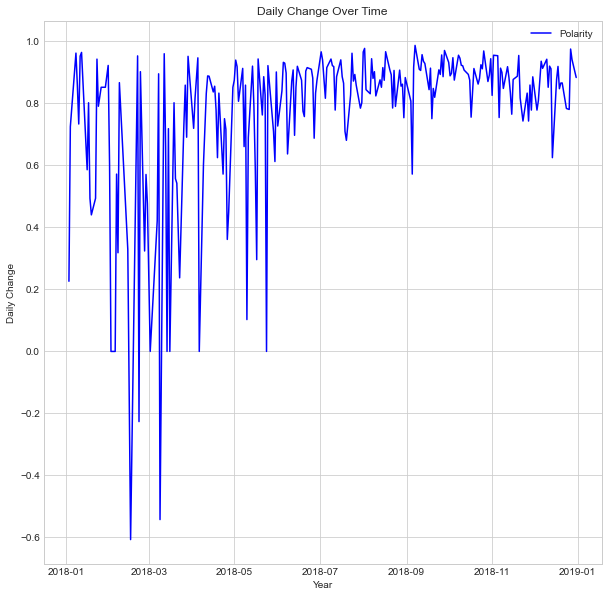

In [97]:
tesla_stock_clean_2018 = teslaTweetStockMerge[(teslaTweetStockMerge['Date'] >= np.datetime64('2018-01-01')) & (teslaTweetStockMerge['Date'] <= np.datetime64('2018-12-31'))]
plt.subplots(figsize=(10, 10))
plt.plot(tesla_stock_clean_2018['Date'], tesla_stock_clean_2018['polarity'], color='b', label='Polarity')
plt.xlabel('Year')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

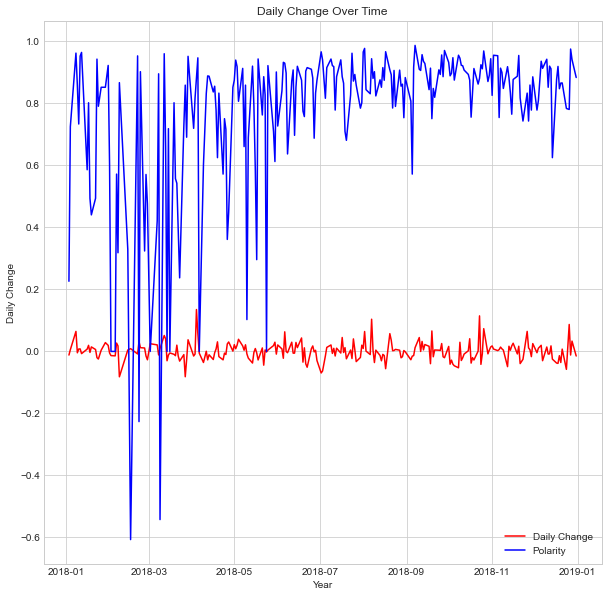

In [98]:
dailyChange = ((tesla_stock_clean_2018['Close'] - tesla_stock_clean_2018['Open'])/tesla_stock_clean_2018['Open'])
plt.subplots(figsize=(10, 10))
plt.plot(tesla_stock_clean_2018['Date'], dailyChange, color='r', label='Daily Change')
plt.plot(tesla_stock_clean_2018['Date'], tesla_stock_clean_2018['polarity'], color='b', label='Polarity')
plt.xlabel('Year')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

In [99]:
print(dailyChange.min())
print(dailyChange.max())
print(tesla_stock_clean_2018['polarity'].min())
print(tesla_stock_clean_2018['polarity'].max())

-0.08179197983569612
0.13513728865840607
-0.6068
0.9869


## Scaling

In [100]:
from sklearn.preprocessing import MinMaxScaler
mms_scale=MinMaxScaler(feature_range=(-0.08179197983569612,0.13513728865840607))
dummyDf = pd.DataFrame(data=tesla_stock_clean_2018['polarity'], columns=['polarity'])
scaled_xtrain=pd.DataFrame(mms_scale.fit_transform(dummyDf), columns=dummyDf.columns)

In [101]:
print(scaled_xtrain.max())
print(scaled_xtrain.min())

polarity    0.135137
dtype: float64
polarity   -0.081792
dtype: float64


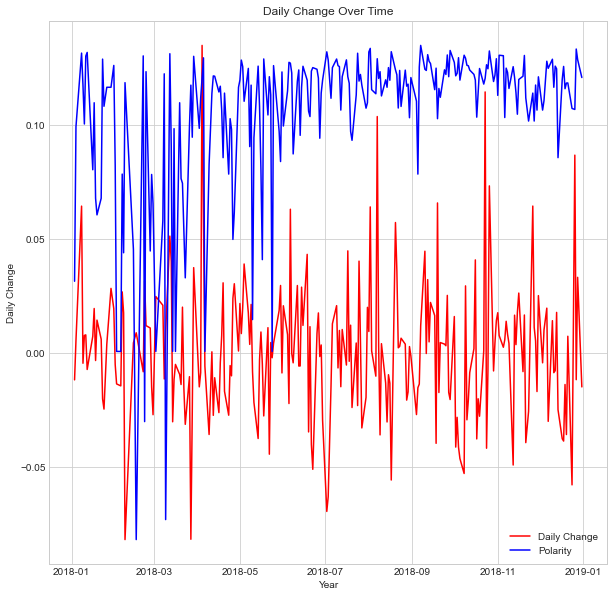

In [102]:
plt.subplots(figsize=(10, 10))
plt.plot(tesla_stock_clean_2018['Date'], dailyChange, color='r', label='Daily Change')
plt.plot(tesla_stock_clean_2018['Date'], scaled_xtrain['polarity'], color='b', label='Polarity')
plt.xlabel('Year')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

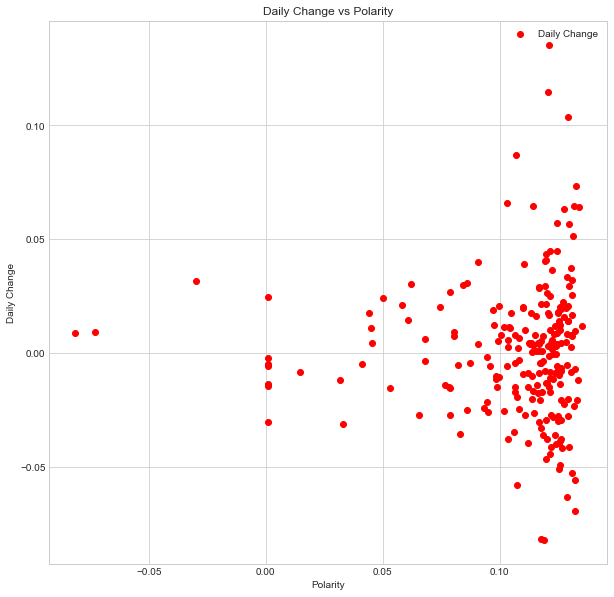

In [103]:
plt.subplots(figsize=(10, 10))
plt.scatter(scaled_xtrain['polarity'], dailyChange, color='r', label='Daily Change')
plt.xlabel('Polarity')
plt.ylabel('Daily Change')
plt.title('Daily Change vs Polarity')
plt.legend()
plt.show()

In [104]:
teslaTweetStockMerge['PriceDiff'] = teslaTweetStockMerge['Close'].shift(-1) - teslaTweetStockMerge['Close']
teslaTweetStockMerge['DailyReturn'] = teslaTweetStockMerge['PriceDiff'] /teslaTweetStockMerge['Close']

In [105]:
dailyChange = tesla_stock_clean_2018['Close'].shift(-1) - tesla_stock_clean_2018['Close']
print(dailyChange.min())
print(dailyChange.max())
print(tesla_stock_clean_2018['polarity'].min())
print(tesla_stock_clean_2018['polarity'].max())

-8.550003051757812
9.739997863769531
-0.6068
0.9869


In [106]:
dailyChange = pd.DataFrame(dailyChange)
dailyChange.rename(columns={0:'DailyChange'}, inplace=True)

## Scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler
mms_scale=MinMaxScaler(feature_range=(-0.6068,0.9869))
dummyDf = pd.DataFrame(data=dailyChange, columns=['Close'])
scaled_xtrain=pd.DataFrame(mms_scale.fit_transform(dummyDf), columns=dummyDf.columns)

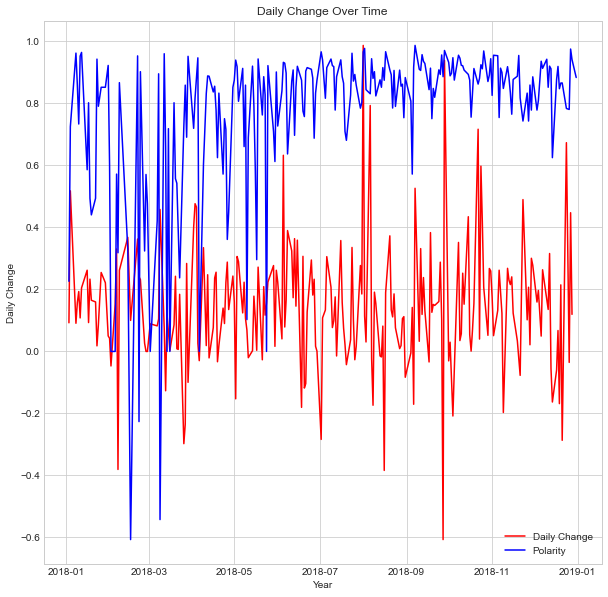

In [108]:
plt.subplots(figsize=(10, 10))
plt.plot(tesla_stock_clean_2018['Date'], scaled_xtrain, color='r', label='Daily Change')
plt.plot(tesla_stock_clean_2018['Date'], tesla_stock_clean_2018['polarity'], color='b', label='Polarity')
plt.xlabel('Year')
plt.ylabel('Daily Change')
plt.title('Daily Change Over Time')
plt.legend()
plt.show()

In [109]:
tesla_stock_clean.index = tesla_stock_clean['Date']

## Moving Average

<ipython-input-110-ddc2ffa66e39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_stock_clean['MA50'] = tesla_stock_clean['Close'].rolling(50).mean()
<ipython-input-110-ddc2ffa66e39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_stock_clean['MA10'] = tesla_stock_clean['Close'].rolling(10).mean()


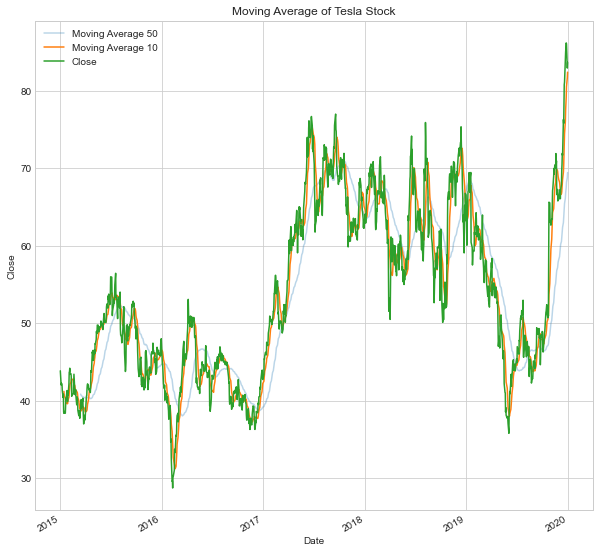

In [110]:
tesla_stock_clean['MA50'] = tesla_stock_clean['Close'].rolling(50).mean()
tesla_stock_clean['MA10'] = tesla_stock_clean['Close'].rolling(10).mean()
#plot the moving average
plt.figure(figsize=(10, 10))
tesla_stock_clean['MA50'].plot(label='Moving Average 50', alpha=0.3)
tesla_stock_clean['MA10'].plot(label='Moving Average 10')
tesla_stock_clean['Close'].plot(label='Close')
plt.title('Moving Average of Tesla Stock')
plt.ylabel('Close')
plt.legend()
plt.show()

In [111]:
tesla_stock_clean['Shares'] = [1 if tesla_stock_clean.loc[sh, 'MA10']>tesla_stock_clean.loc[sh, 'MA50'] else 0 for sh in tesla_stock_clean.index]
tesla_stock_clean['CloseNew'] = tesla_stock_clean['Close'].shift(-1)
tesla_stock_clean['Profit'] = [tesla_stock_clean.loc[sh, 'CloseNew'] - tesla_stock_clean.loc[sh, 'Close'] if tesla_stock_clean.loc[sh, 'Shares']==1 else 0 for sh in tesla_stock_clean.index]
tesla_stock_clean['cumulativeGrowth'] = tesla_stock_clean['Profit'].cumsum()
tesla_stock_clean.tail(10)

<ipython-input-111-e1d542058593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_stock_clean['Shares'] = [1 if tesla_stock_clean.loc[sh, 'MA10']>tesla_stock_clean.loc[sh, 'MA50'] else 0 for sh in tesla_stock_clean.index]
<ipython-input-111-e1d542058593>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_stock_clean['CloseNew'] = tesla_stock_clean['Close'].shift(-1)
<ipython-input-111-e1d542058593>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Date        Low       Open    Volume       High      Close  \
Date                                                                          
2019-12-17 2019-12-17  75.180000  75.797997  42484000  77.099998  75.797997   
2019-12-18 2019-12-18  76.115997  76.125999  70605000  79.043999  78.629997   
2019-12-19 2019-12-19  79.300003  79.463997  90535500  81.370003  80.807999   
2019-12-20 2019-12-20  80.038002  82.057999  73763500  82.599998  81.117996   
2019-12-23 2019-12-23  82.000000  82.356003  66598000  84.402000  83.844002   
2019-12-24 2019-12-24  82.538002  83.671997  40273500  85.094002  85.050003   
2019-12-26 2019-12-26  85.269997  85.582001  53169500  86.695999  86.188004   
2019-12-27 2019-12-27  85.222000  87.000000  49728500  87.061996  86.075996   
2019-12-30 2019-12-30  81.851997  85.758003  62932000  85.800003  82.940002   
2019-12-31 2019-12-31  80.416000  81.000000  51428500  84.258003  83.666000   

            Adjusted Close      MA50       MA10  Shares   CloseNew    Profit  \
Date                                                                           
2019-12-17       75.797997  63.56860  70.378400       1  78.629997  2.832001   
2019-12-18       78.629997  64.18100  71.580799       1  80.807999  2.178001   
2019-12-19       80.807999  64.81904  73.054199       1  81.117996  0.309998   
2019-12-20       81.117996  65.46244  74.448199       1  83.844002  2.726006   
2019-12-23       83.844002  66.14776  76.041999       1  85.050003  1.206001   
2019-12-24       85.050003  66.82092  77.570200       1  86.188004  1.138000   
2019-12-26       86.188004  67.51312  79.135000       1  86.075996 -0.112007   
2019-12-27       86.075996  68.19564  80.549000       1  82.940002 -3.135994   
2019-12-30       82.940002  68.80656  81.675200       1  83.666000  0.725998   
2019-12-31       83.666000  69.45208  82.411800       1        NaN       NaN   

            cumulativeGrowth  
Date                          
2019-12-17         20.657970  
2019-12-18         22.835972  
2019-12-19         23.145969  
2019-12-20         25.871975  
2019-12-23         27.077976  
2019-12-24         28.215977  
2019-12-26         28.103970  
2019-12-27         24.967976  
2019-12-30         25.693974  
2019-12-31               NaN

<ipython-input-112-3168ae711db9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_stock_clean['LogReturn'] = np.log(tesla_stock_clean['Close']).shift(-1) - np.log(tesla_stock_clean['Close'])


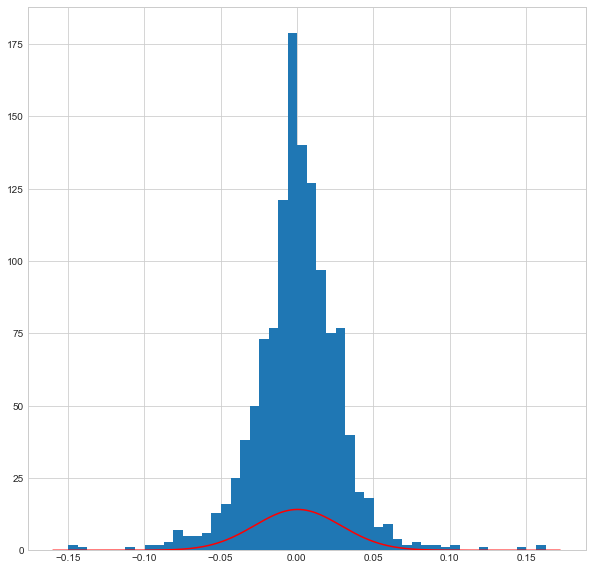

In [112]:
tesla_stock_clean['LogReturn'] = np.log(tesla_stock_clean['Close']).shift(-1) - np.log(tesla_stock_clean['Close'])
from scipy.stats import norm
a = tesla_stock_clean['LogReturn'].mean()
b = tesla_stock_clean['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(tesla_stock_clean['LogReturn'].min()-0.01, tesla_stock_clean['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], a, b)

tesla_stock_clean['LogReturn'].hist(bins=50, figsize=(10, 10))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [113]:
teslaTweetStockMerge

Date        Low       Open    Volume       High      Close  \
0   2015-02-12  38.655998  38.714001  78248000  40.618000  40.576000   
1   2015-03-17  38.787998  39.085999  24470500  39.742001  38.945999   
2   2015-03-18  38.622002  38.992001  24104500  40.175999  40.141998   
3   2015-03-27  36.279999  37.813999  43024500  37.858002  37.000000   
4   2015-03-30  36.360001  37.169998  50447500  38.450001  38.113998   
..         ...        ...        ...       ...        ...        ...   
715 2019-12-24  82.538002  83.671997  40273500  85.094002  85.050003   
716 2019-12-26  85.269997  85.582001  53169500  86.695999  86.188004   
717 2019-12-27  85.222000  87.000000  49728500  87.061996  86.075996   
718 2019-12-30  81.851997  85.758003  62932000  85.800003  82.940002   
719 2019-12-31  80.416000  81.000000  51428500  84.258003  83.666000   

     Adjusted Close ticker_symbol  \
0         40.576000          TSLA   
1         38.945999          TSLA   
2         40.141998          TSLA   
3         37.000000          TSLA   
4         38.113998          TSLA   
..              ...           ...   
715       85.050003          TSLA   
716       86.188004          TSLA   
717       86.075996          TSLA   
718       82.940002          TSLA   
719       83.666000          TSLA   

                                                  body  comment_num  \
0    I swear I thought I was on the Delorean Motor ...           35   
1    @elonmusk Let us see whether or not you benefi...            3   
2    BREAKING: NJ Gov. Christie signs bill into law...           18   
3    Elon Musk: Localized Telsa Production Is Comin...            1   
4    Here's what a single tweet from Elon Musk can ...           14   
..                                                 ...          ...   
715  Year in review. Tesla baby. Check it out. $tsl...          234   
716  YouTube of China Bilibili to be Available for ...           63   
717  Who thinks $TSLA GF3 was a joke from the begin...          149   
718      if you’re upset $TSLA is down, you’re a baby            92   
719  “Our children and grandchildren are the ones w...           39   

     retweet_num  like_num  polarity  PriceDiff  DailyReturn  
0             42        77   -0.0516  -1.630001    -0.040172  
1              5        51   -0.3570   1.195999     0.030709  
2            253       168    0.0000  -3.141998    -0.078272  
3             16       117    0.0000   1.113998     0.030108  
4            174       118    0.0000  -0.595997    -0.015637  
..           ...       ...       ...        ...          ...  
715          172       835    0.8910   1.138000     0.013380  
716           90       606    0.8779  -0.112007    -0.001300  
717          356       972    0.9509  -3.135994    -0.036433  
718           73       804    0.8829   0.725998     0.008753  
719           66       521    0.9556        NaN          NaN  

[720 rows x 15 columns]

In [114]:
tesla_Temp = pd.DataFrame(teslaTweetStockMerge[['Low', 'Open', 'Volume', 'High', 'Close','comment_num','retweet_num','like_num', 'polarity', 'Date']])

In [115]:
tesla_Temp

Low       Open    Volume       High      Close  comment_num  \
0    38.655998  38.714001  78248000  40.618000  40.576000           35   
1    38.787998  39.085999  24470500  39.742001  38.945999            3   
2    38.622002  38.992001  24104500  40.175999  40.141998           18   
3    36.279999  37.813999  43024500  37.858002  37.000000            1   
4    36.360001  37.169998  50447500  38.450001  38.113998           14   
..         ...        ...       ...        ...        ...          ...   
715  82.538002  83.671997  40273500  85.094002  85.050003          234   
716  85.269997  85.582001  53169500  86.695999  86.188004           63   
717  85.222000  87.000000  49728500  87.061996  86.075996          149   
718  81.851997  85.758003  62932000  85.800003  82.940002           92   
719  80.416000  81.000000  51428500  84.258003  83.666000           39   

     retweet_num  like_num  polarity       Date  
0             42        77   -0.0516 2015-02-12  
1              5        51   -0.3570 2015-03-17  
2            253       168    0.0000 2015-03-18  
3             16       117    0.0000 2015-03-27  
4            174       118    0.0000 2015-03-30  
..           ...       ...       ...        ...  
715          172       835    0.8910 2019-12-24  
716           90       606    0.8779 2019-12-26  
717          356       972    0.9509 2019-12-27  
718           73       804    0.8829 2019-12-30  
719           66       521    0.9556 2019-12-31  

[720 rows x 10 columns]

## Variation

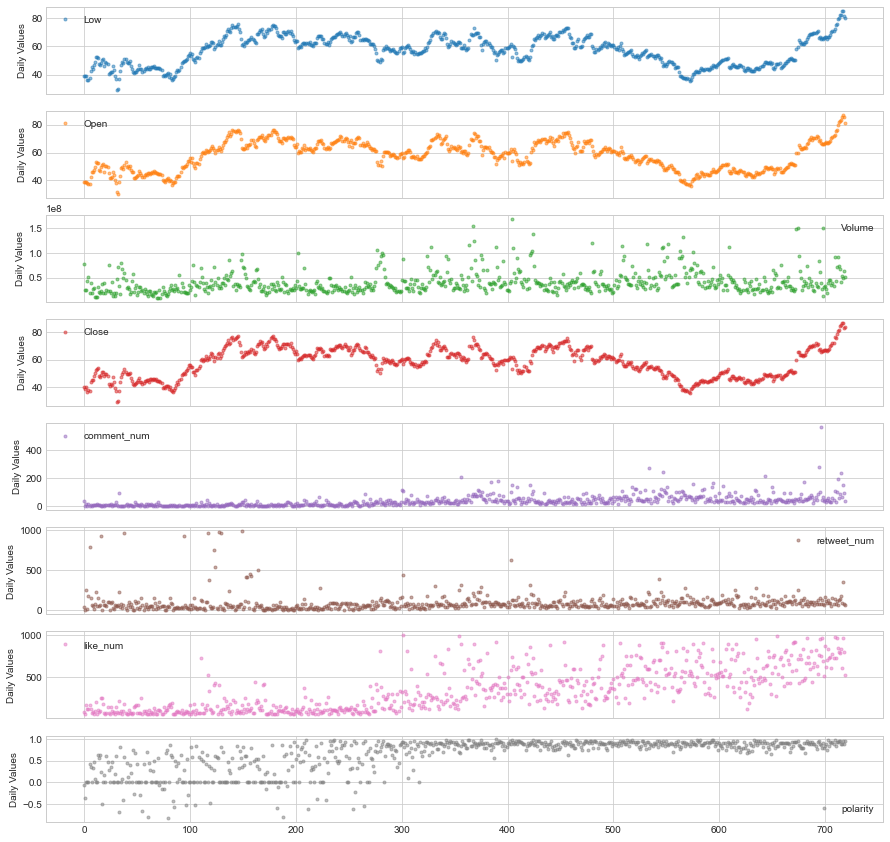

In [116]:
cols_plot = ['Low', 'Open', 'Volume', 'Close','comment_num','retweet_num','like_num','polarity']
axes = tesla_Temp[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Values')
plt.savefig('foo.png')

In [117]:
tesla_Temp.head()

Low       Open    Volume       High      Close  comment_num  \
0  38.655998  38.714001  78248000  40.618000  40.576000           35   
1  38.787998  39.085999  24470500  39.742001  38.945999            3   
2  38.622002  38.992001  24104500  40.175999  40.141998           18   
3  36.279999  37.813999  43024500  37.858002  37.000000            1   
4  36.360001  37.169998  50447500  38.450001  38.113998           14   

   retweet_num  like_num  polarity       Date  
0           42        77   -0.0516 2015-02-12  
1            5        51   -0.3570 2015-03-17  
2          253       168    0.0000 2015-03-18  
3           16       117    0.0000 2015-03-27  
4          174       118    0.0000 2015-03-30

In [118]:
X = [tesla_Temp[['Low', 'Open', 'High', 'comment_num', 'retweet_num', 'like_num', 'polarity']]]
y = [tesla_Temp[['Close']]]

In [119]:
X = pd.DataFrame(data=X[0])

In [120]:
y = pd.DataFrame(data=y[0])

In [121]:
X = X.values
y = y.values

### Splitting into training and test set

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Linear Regression

In [123]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred = regressor.predict(X_test)

In [125]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9962831289577018

In [126]:
y_pred = regressor.predict(X_train)

In [127]:
r2_score(y_train, y_pred)

0.9974310329824697

## Classic sign of overfitting of data

## Support Vector Regression

In [128]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [129]:
# Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\aakas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [130]:
y_pred = regressor.predict(X_test)

In [131]:
r2_score(y_test, y_pred)

-31.52877996451548

In [132]:
y_pred = regressor.predict(X_train)
r2_score(y_train, y_pred)

-30.860378685268888

## Terrible underfitting of data

In [133]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [135]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.9962831289577018

# Conclusion

We can draw the following inferences from our experiments. <br/>
1. The big juggernauts of tech world have no impact on how people perceive them on social media. <br/>
2. In-fact social media is dictated on how they carry out their business activities. <br/>
3. We have proven it both mathematically and programmatically that there is no connection between social media and stocks. <br/>